<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/predicciones-de-ventas/blob/main/Predicciones_de_ventas_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis de datos

## Propiedades de productos y desempeño de puntos de venta

## Bibliotecas a utilizar

In [4]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

## Se tiene el siguiente dataframe a analizar

In [7]:
filename = "/content/drive/MyDrive/Data CodingDojo/sales_predictions.csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df.isna().sum().sum()

3873

In [10]:
df.duplicated().sum()

0

# Informacion acerca el dataframe
# Inicialmente, el dataframe consiste de lo siguiente:

Dimension: 8523 Registros y 12 Columnas

Nulos: 3873
 >"Item_Weight" Tiene 1463 nulos

 >"Outlet_Size" Tiene 2410 nulos

Duplicados: Sin registros duplicados


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Analisis y manipulacion de datos con Pandas

## Busqueda de registros duplicados

Se realiza busqueda de duplicados con funcion .duplicated() , la cual no arroja resultados.

In [12]:
df.duplicated().sum()

0

## Valores faltantes

La busqueda se realizo con funcion .isna(), con la cual se identifico las columnas comprometidas como la cantidad de registros faltantes.

In [13]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
df[df["Item_Weight"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [15]:
df[df["Outlet_Size"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


## Resolucion para valores faltantes de columna "Item_Weight". 

Se identifica que, los valores nulos correspondiente a determinados "Item_Identifier" asociados a ciertas tiendas, se podian encontrar dentro del dataframe.

Por ende, se realiza una agrupacion de Items y sus respectivos Pesos para que, con ellos podamos iterar y buscar el valor correspondiente al Item con Item Weight nulo.


In [16]:
#Se crea nuevo dataframe con el identificador del item su peso correspondiente. Luego se crea un diccionario con el dato.
df_IW = df.groupby('Item_Identifier')[['Item_Weight']].mean()
dic_IW = dict(zip(df_IW.index,df_IW.values))

In [17]:
#El for loop a continuacion nos ayudara con los valores nulos, buscando el valor correspondiente al item.
for x in df.index:
  if df.loc[x,'Item_Weight'] != np.nan:
    for a in dic_IW.keys():
      if df.loc[x,'Item_Identifier'] == a:
        df.loc[x,'Item_Weight'] = dic_IW[a]
df.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

luego de la solucion aplicada, nos quedan 4 registros nulos en columna "Item_Weight" los cuales no es posible identificar el valor faltante.

Es por eso que se decide eliminarlos ya que no presentan una cantidad influyente en el analisis a realizar.

In [18]:
#Identificacion de valores nulos restantes, luego de solucion aplicada.
df[df["Item_Weight"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [19]:
#Eliminacion de registros con valores nulos.
df.drop(index=[927,1922,4187,5022], inplace=True)

## Resolucion para valores faltantes de columna "Outlet_Size".

Luego de examinar el conjunto de datos, se determina que al no tener mayor relevancia en el resultado final. se decide prescindir de esta columna ya que no aportara mayor informacion.

Opcion desechada:

>Rellenar con la moda: Se decide no utilizar este metodo puesto que son muchos registros faltantes y llenar con el valor mas repetido sesgara nuestro analisis.

In [20]:
df[df["Outlet_Size"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [21]:
#Eliminacion de columna Outlet_Size
df = df.drop(columns="Outlet_Size")

### Con esto, ya no quedan valores nulos

In [22]:
print("Valores nulos en dataframe:" , df.isna().sum().sum())

Valores nulos en dataframe: 0


#Categoria incosistente

Se aprecia con .value_counts(), que la columna Item_Fat_Content presenta registros que representan lo mismo pero definido de distintas formas, como:

Low Fat, Regular, LF, reg y low fat

In [23]:
df["Item_Fat_Content"].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Ya teniendo los valores unicos de la columna identificados, se procede a cambiar los valores para su estandarizacion.

In [24]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("low fat","Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("LF","Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("reg","Regular")

In [25]:
df["Item_Fat_Content"].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

# Fin de Preprocesamiento de datos.

# Visualizacion de datos


Definicion de variables y filtros

In [26]:
low_fat = df["Item_Fat_Content"]=="Low Fat"
grocery_store = df["Outlet_Type"] == "Grocery Store"

## Histograma

Text(0, 0.5, 'Number of Item')

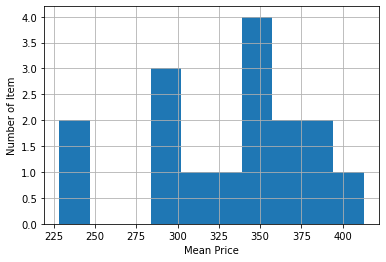

In [27]:
df[grocery_store].groupby("Item_Type")["Item_Outlet_Sales"].mean().hist()
plt.xlabel('Mean Price')
plt.ylabel('Number of Item')

En el grafico se aprecia  el promedio de ventas de Items "Low Fat" en tiendas tipo " Grocery Store", donde 4 Productos estan en el rango de los 325 dolares promedio.

## Boxplot

Se busca evaluar los objetos vendidos en tienda tipo "Grocery Store" y el rango de valor de ellos.

esto para identificar posibles outliers o precios fuera de lo comun

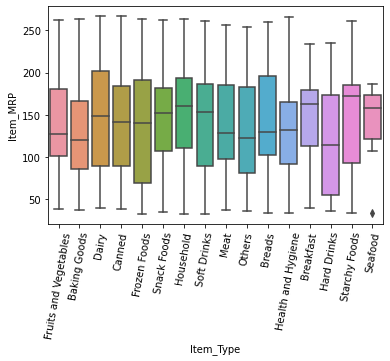

In [88]:
#Filtros para graficar
tienda = df["Outlet_Type"] == "Grocery Store"  # aislamos el tipo de tienda para su analisis
df_tienda = df[tienda] # se asigna filtro a dataframe
grafico = sns.boxplot(x="Item_Type",y="Item_MRP", data=df_tienda)
grafico.set_xticklabels(grafico.get_xticklabels(),rotation=80); #linea de codigo nos ayuda a rotar etiquetas para su mejor comprension. fuente: stackoverflow

El boxplot nos permite ver valores minimos y maximos, como tambien la concentracion de precios de productos por categoria.
donde tambien se aprecia un outlier en categoria "Seafood"

In [ ]:
#OUTLIER visto en Comida tipo Seafood
df_tienda[(df_tienda["Item_Type"] == "Seafood") & (df_tienda["Item_MRP"] < 50)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6986,FDJ45,17.75,Low Fat,0.128533,Seafood,34.2216,OUT019,1985,Small,Tier 1,Grocery Store,173.108


## Heatmap

A continuacion, a traves de un heatmap buscaremos las caracteristicas de nuestro dataframe que esten directa o indirectamente relacionadas con nuestro objetivo, para con esto potenciar las ventas en el sector de Grocery Store


A continuacion se crea filtro para tienda Grocery Store

In [92]:
tienda = df["Outlet_Type"] == "Grocery Store"

corr = df[tienda].corr()

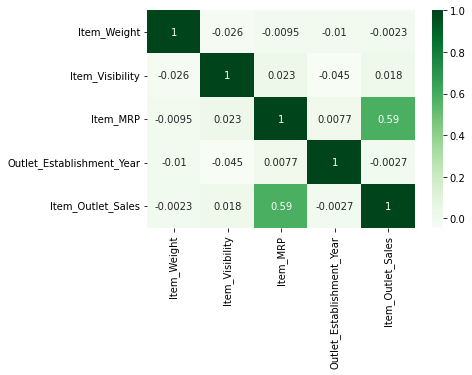

In [93]:
grafico_heatmap =sns.heatmap(corr, cmap="Greens", annot=True)

Se puede apreciar una  correlacion positiva entre los valores

item_visibility y item_outlet_sales, aunque pequena. es donde se pretende mejorar para aumentar las ventas

# Visualizaciones para el entendimiento de la problematica

## Se busca potenciar ventas de tiendas Grocery Store, para lo cual, primero debemos visualizar el total de ventas por tipo de objeto vendidos

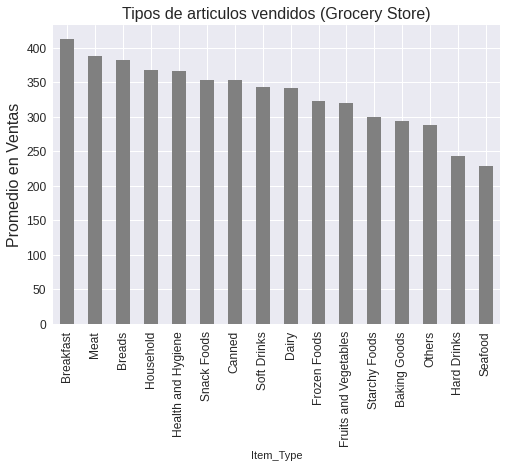

In [ ]:
tipo_tienda = df["Outlet_Type"] == "Grocery Store"# aislamos el tipo de tienda para ejecutar analisis

df[tipo_tienda].groupby("Item_Type")["Item_Outlet_Sales"].mean().sort_values(ascending=False).plot(kind="bar",fontsize = 12, color="gray")
plt.style.use('seaborn');
plt.title('Tipos de articulos vendidos (Grocery Store)',fontsize = 16);
plt.ylabel('Promedio en Ventas',fontsize = 16);
plt.xticks(rotation = 90);

## Comparacion TOP 3, mayor promedio de ventas vs menor promedio de ventas para su posterior analisis

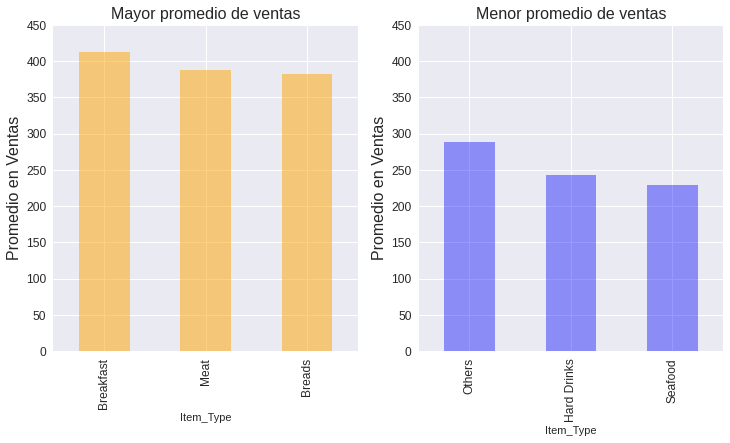

In [ ]:
plt.figure(figsize =(12,6)) # define el tamanio del grafico a visualizar

plt.subplot(1,2,1); # nos ayuda a comparar 2 graficos
plt.style.use('seaborn');
df[tienda].groupby("Item_Type")["Item_Outlet_Sales"].mean().sort_values(ascending=False).head(3).plot(kind="bar",fontsize = 12,color = 'orange',alpha =.5)
plt.title('Mayor promedio de ventas',fontsize = 16);
plt.ylabel('Promedio en Ventas',fontsize = 16);
plt.xticks(rotation = 90);
plt.ylim(bottom=0,top=450); #como se compara el item mas alto con el mas bajo en graficos distintos , es importante mantener la escala del grafico para evitar sesgo visual

plt.subplot(1,2,2);
plt.style.use('seaborn');
df[tienda].groupby("Item_Type")["Item_Outlet_Sales"].mean().sort_values(ascending=False).tail(3).plot(kind="bar",fontsize = 12,color = "blue",alpha = .4)
plt.title('Menor promedio de ventas',fontsize = 16);
plt.ylabel('Promedio en Ventas',fontsize = 16);
plt.xticks(rotation = 90);
plt.ylim(bottom=0,top=450);

# Preparacion para el entrenamiento de los datos

## Codificacion ordinal

"Item_Fat_Content": Low fat, Regular > 0, 1


"Outlet_Location_Type" Tier1 , Tier2, Tier 3 > 0, 1, 2

In [109]:
replacement_fat_content = {"Low Fat":0,"Regular":1}
replacement_outlet_location = {"Tier 1":0,"Tier 2":1,"Tier 3": 2}

df["Item_Fat_Content"].replace(replacement_fat_content, inplace=True)
df["Outlet_Location_Type"].replace(replacement_outlet_location, inplace=True)

In [110]:
df["Outlet_Location_Type"].value_counts()

2    3347
1    2785
0    2387
Name: Outlet_Location_Type, dtype: int64

In [146]:
#Train test split
X = df.drop(columns = "Item_Outlet_Sales")

y = df["Item_Outlet_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [147]:
#Instanciar selectores de columnas
cat_selector = make_column_selector(dtype_include="object")
num_selector = make_column_selector(dtype_include="number")

In [148]:
# Instanciar transformadores
# scaler
scaler = StandardScaler()

# onehotencoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

In [178]:
# Crear pipeline
num_pipe = make_pipeline(scaler)
cat_pipe = make_pipeline(ohe)

In [150]:
# instanciar column transformer
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f485c9b0490>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f485c9b0640>)])

In [151]:
# ajuste de column transformer a datos de entrenamiento
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f485c9b0490>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f485c9b0640>)])

In [152]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [153]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6389, 1581)




array([[ 0.73966219, -0.74008301, -0.70557556, ...,  0.        ,
         1.        ,  0.        ],
       [-0.19656335, -0.74008301,  1.30400847, ...,  0.        ,
         0.        ,  0.        ],
       [-1.66977343, -0.74008301,  0.3463181 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.5682756 ,  1.35119977,  1.08837392, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.60055924, -0.74008301, -0.22039966, ...,  1.        ,
         0.        ,  0.        ],
       [-1.07790671, -0.74008301, -1.28403877, ...,  1.        ,
         0.        ,  0.        ]])

In [154]:
X_train_processed_df = pd.DataFrame(X_train_processed)
X_train_processed_df

,0,1,2,3,4,5,6,7,8,9,...,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580
0,0.739662,-0.740083,-0.705576,1.837974,1.332059,1.097156,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.196563,-0.740083,1.304008,-0.281413,-1.535168,-1.358951,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.669773,-0.740083,0.346318,1.691163,0.137381,-1.358951,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.013623,-0.740083,0.837109,1.467227,0.495785,-0.130898,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.341497,1.351200,-1.284039,-1.604467,1.332059,1.097156,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6384,-0.271892,-0.740083,2.104845,-1.408160,-1.535168,1.097156,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6385,0.470632,-0.740083,0.197216,-0.851199,-1.535168,1.097156,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6386,1.568276,1.351200,1.088374,-0.749051,-0.101554,-1.358951,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6387,1.600559,-0.740083,-0.220400,-0.375571,1.093124,-0.130898,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Modelo Regresion lineal para predecir ventas

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
reg = LinearRegression()

In [157]:
reg.fit(X_train_processed, y_train)

LinearRegression()

El valor de R^2 en los datos de entrenamiento es 0,67 mientras que en el conjunto de prueba es -2.22

In [164]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [168]:
train_preds = reg.predict(X_train_processed)
test_preds = reg.predict(X_test_processed)


In [177]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)
print("R2 Train:", r2_train, "R2 test:", r2_test)


R2 Train: 0.671257949130351 R2 test: -2.2209286525559472e+19


Mientras el valor de RECM fue:

conjunto de entrenamiento: 980.21

conjunto de prueba: 7995063323842

In [175]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print( "rmse_train:", rmse_train, "rmse_test:", rmse_test)

rmse_train: 980.2168449668094 rmse_test: 7995063323842.932


# Modelo de arbol de regresion para predecir ventas

In [181]:
from sklearn.tree import DecisionTreeRegressor

In [182]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [183]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [184]:
train_score_tree = dec_tree.score(X_train_processed, y_train)
test_score_tree = dec_tree.score(X_test_processed, y_test)
print("train score:", train_score_tree, "test score:", test_score_tree)

train score: 1.0 test score: 0.23037197919967056


El resultado de nuestro modelo de arbol de regresion fu:

train: 1,0  y test: 0,2303

##Ahora realizaremos la optimizacion para mejorar el score en nuestro conjunto de prueba

In [189]:
dec_tree.get_depth()

60

In [198]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [195]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 10))# will try every value between 2 and 60
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)


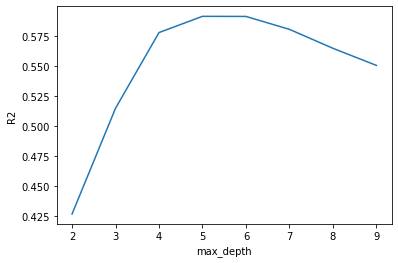

In [196]:
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [197]:
dec_tree_optimizado = DecisionTreeRegressor(random_state = 42, max_depth = 6)
dec_tree_optimizado.fit(X_train_processed, y_train)
train_score_tree_opt = dec_tree_optimizado.score(X_train_processed, y_train)
test_score_tree_opt = dec_tree_optimizado.score(X_test_processed, y_test)
print("train score:", train_score_tree_opt, "test score:", test_score_tree_opt)

train score: 0.6169263579428407 test score: 0.5910866136083895


### Tras la optimizacion de nuestro modelo de arbol de regression se obtuvo un test_score de 0.59, lo cual es significativamente mayor al obtenido con los parametros por defecto

# Tras las predicciones hechas, se recomienda utilizar el modelo de arbol de regression el cual, al estar optimizado, arrojo resultados significativamente mejores que el modelo de regresion lineal

Dado que mientras mas alto es R^2 mejor. y considerando que el modelo de arbol optimizado obtuvo el mejor R^2 CON 0.59. Se puede decir que el 59% de la variacion en nuestro objetivo se puede explicar por las caracteristicas del modelo.